# **Introduction**

In the previous notebook we introduced LQR as a way to produce state feedback gains $\bf{K}$ resulting in stable Eigen values for a given linear time invariant system. Now we use LQR to perform stabilization at a reference set point $\bf x_{ref}$ and tracking a reference trajectory $\bf x_{ref}(t)$, i.e., stabilization and tracking.

*  *Stabilization* - controling a system to reach and remain stable at a given desired set point $\mathbf{x}_{ref}$, i.e., $\mathbf{x} \rightarrow \mathbf{x}_{ref}$  as $t \rightarrow \infty$

* *Tracking* - controling a system to follow and remain stable along a desired time varying trajectory $\mathbf{x}_{ref}(t)$.

We will also look at how this concept can be applied to nonlinear models using linearization of the system and implications of this approximation on the stability of a system.


# **Equilibrium points**

An equilibrium point of a system is defined as any state $\bf{x_{ref}}$ where the dynamics become zero.

$$ \mathbf{0} = f(\mathbf{ x_{ref}},\mathbf{u_{ref}})$$

We can only control a system to stabilize at an equilibrium point. This is because all other states are in transition i.e.,   $ \mathbf{\dot{x}} \neq 0$

We can transition through points which are not equilibrium points ( follow a trajectory) . This is performed when controlling a system along a trajectory (tracking).




























































































































































































































































































































































































































































































































































































































                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    each and stay at equilibrium points. All other states can only be reached instantanously and will change due to the non zero dynamics associaed with the state.


In [2]:
%%capture
!pip install control
!pip install underactuated
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from IPython.display import clear_output


# # we clone the following repository for this course which has all the utility functions and visulization functions used in the course.
!pip install jaxlie
!sudo apt update
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
!sudo apt install cm-super
! rm -r GNCmun
! git clone https://github.com/sendtooscar/GNCmun.git
import sys
path_to_module = 'GNCmun'
sys.path.append(path_to_module)
import utils as utils
import gnc_animations as gnc
from utils import rotnp
import gnc_animations as gnc

# **LQR Control - Stabilization**

For stabilization at a state $\bf x_{ref}$ with control input $\bf u_{ref}$, we first define a tracking error vector $\bf \Delta x = x - x_{ref}$ and an input vecor $\bf \Delta u = u - u_{ref}$.

Note that for stabilization $\bf x_{ref}, u_{ref}$ should be an equilibrium point, i.e., $A\mathbf{x_{ref}} + B\mathbf{u_{ref}}=\mathbf{0}$ or more generally $f( \mathbf{x}_{ref}, \mathbf{u}_{ref}) = \mathbf{0}$.

Differentiation of the tracking error yields the tracking error dynamics:
$$ \Delta\dot{\mathbf{x}} = A\Delta\mathbf{ x} + B\Delta\mathbf{u}$$
If this system is controllable it can be stabilized using a state feedback gain $K$ which can be found using an LQR. The following optimization problem is solved with a cost function $J(\Delta \bf{x},\Delta \bf{u})$.

$$  \underset{\Delta\mathbf{u}}{\mathrm{argmin}} ~ J = \int_0^\infty \left[ \Delta\mathbf{x}^T {\bf Q}  \Delta\mathbf{x} +  \Delta\mathbf{u}^T {\bf R}  \Delta\mathbf{u} \right] dt \\ \quad {\bf Q} = {\bf Q}^T \succeq {\bf 0}, {\bf R} = {\bf R}^T \succ 0 $$

Here Q  penalizes (increases the cost) for not being at the equilibrium point and R penalizes applying control effort on the system. The relative magnitude of these two tuning parameters determine how aggressive the controller is when stabilizing the system.  The solution for this problem is well established, and is the optimal controller for the provied linear quadratic cost function. The resulting controller is:

$$ \Delta\mathbf{u}^* = -\bf{K} \Delta\mathbf{x}\\
K =R^{-1}B^{T}S$$

where $\Delta\mathbf{u}^*$ is the optimal control action (optimal policy) and $\bf S$ defines the minimum cost $J^*$ as a result of folowing the optimal control policy. This is termed as the optimal cost to go.
$$ J^* =\Delta\mathbf{x}^T\bf{S}\Delta\mathbf{x}$$


$\bf{S}$ is found using the solution of the continous algebric Ricatti equation (CARE) given below:

$$0 = {\bf S} {\bf A} + {\bf A}^T
    {\bf S} - {\bf S} \bf B {\bf R}^{-1} \bf B^T {\bf S} + {\bf Q} $$



Finding the controller can be performed by calling (K,S) = LinearQuadraticRegulator(A,B,Q,R) or similar using a python control package. And the control action can be applied to the system to stabilize at an equilibrium point using the control law:
$$ \Delta\mathbf{u} = -\bf{K} \Delta\mathbf{x}\\
\implies \bf u = -K(x-x_{ref}) + u_{ref} $$

Note that the resulting Gain $K$ is not time varying, i.e., consant,  as such it can be precomputed.

## **Example 2.10**

Consider the double integrator system model given by the following A,B,C matrices. Find gains of an LQR controller and show that the response of the system when an initial condition of $(1,2)$ converges to zero.

[[3.16227766 4.04036574]]


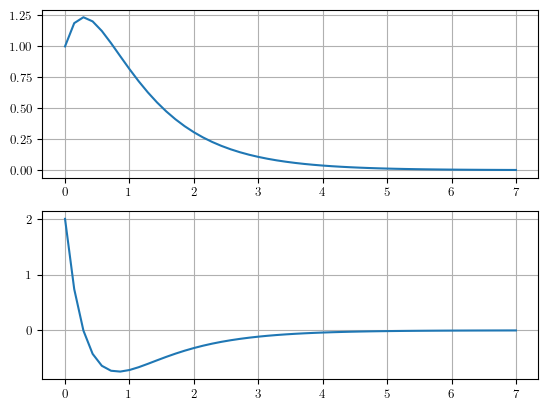

In [3]:
# The state space model
A= np.array([[0, 1.0],[0, 0]])
B= np.array([[0], [1.0]]);
C= np.eye(2);

Q = 1.0*np.eye(2)
R =  0.1*np.identity(1)

Kc, S, E = ct.lqr(A, B, Q,R)
print(Kc)
#the new autonoumous system becomes dx= (A-B*Kc)x
A_new=(A-B@Kc)

sys = ct.ss(A_new,[0,0],C,0)  # Define the system
T, yout =ct.initial_response(sys,np.linspace(0.0, 7.0, num=50),[1,2])  # simulate the system model
#for 7 seconds using an initial condition of (1,2)
fig, axs = plt.subplots(2, 1)
axs[0].plot(T,yout[0]);axs[0].grid()
axs[1].plot(T,yout[1]);axs[1].grid()

# **Phase Plane Plot**

* A phase plane plot shows the trajectory $x(t)$ followed by two of the states of a system starting from different initial conditions $x_0$ in the state space.

* A collection of such trajectories starting at different intial conditions gives an insight to how a system behaves. The resulting figure is a vector field which illustrates the time propogagion of each of the states in the state space of the system.

* As an example, consider the system given by the model below.  One can draw a phase plane plot when there are no inputs are applied to the system. i.e, $\bf{u} =0$

$f(x) = \begin{bmatrix} v \\ 0 \end{bmatrix}$

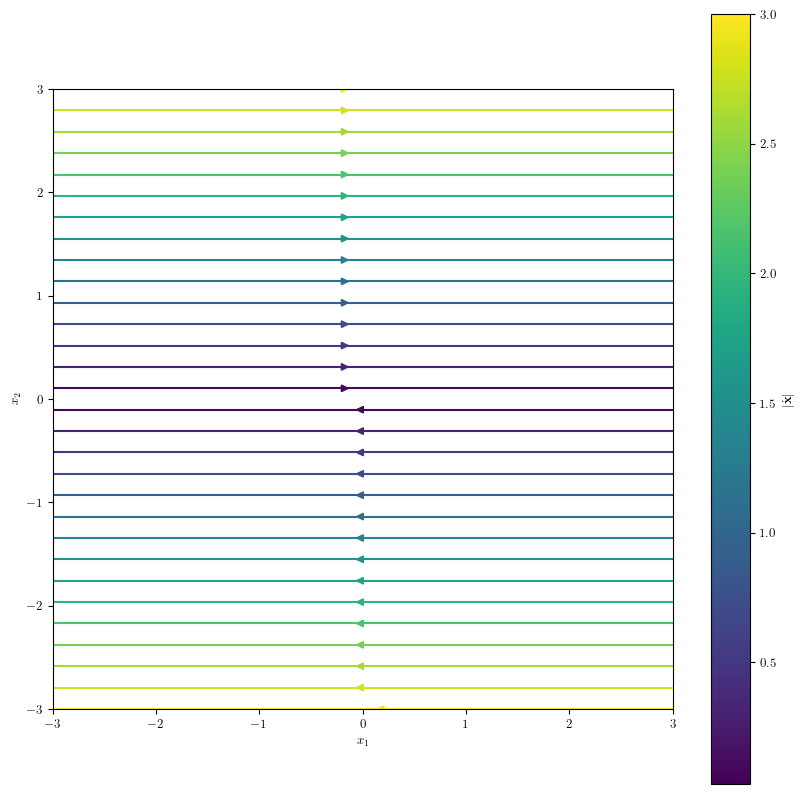

In [4]:
# here we use the pydrake package to define the symbolic dynamic model
from pydrake.all import (
    LinearSystem,
    ToLatex,
    Variable,
    LinearQuadraticRegulator,
    SymbolicVectorSystem,
    RegionOfAttraction
)
from underactuated import plot_2d_phase_portrait, running_as_notebook

from IPython.display import Markdown, display


def pahse_plane_doubleint():
  # Define Symbolic Variables: States = [theta, dtheta]
  p = Variable("p")
  v = Variable("v")

  # States and State-space Form:
  x = np.array([p, v])
  f = A@x
  display(Markdown("$f(x) = " + ToLatex(f) + "$"))


  sys = SymbolicVectorSystem(state=x, dynamics=f)
  fig, ax = plt.subplots(figsize=(10, 10))
  plot_2d_phase_portrait(sys, (-3, 3), (-3, 3))




pahse_plane_doubleint()

The above vector field has many equilibrium points, i.e., $∀ \bf{x} = (p,v)$ such that $v =0$. Now if we consider a feedback controller with gains K applied on it. The vector field changes as follows to stabilize at one equilibrium point.

Also the optimal cost $J(x)=\bf{x}^TSx$ serves as a convex function which happens to produce negative gradients along the state trajectories.

[[3.16227766 4.04036574]]
[[1.27767583 0.31622777]
 [0.31622777 0.40403657]]


$J(x) = (p (1.278p + 0.316v) + v (0.316p + 0.404v))$

$\dot{J}(x) = (v (2.555p + 0.632v) + ( - 3.162p - 4.040v) (0.632p + 0.808v))$

$f(x) = \begin{bmatrix} v \\ ( - 3.162p - 4.040v) \end{bmatrix}$

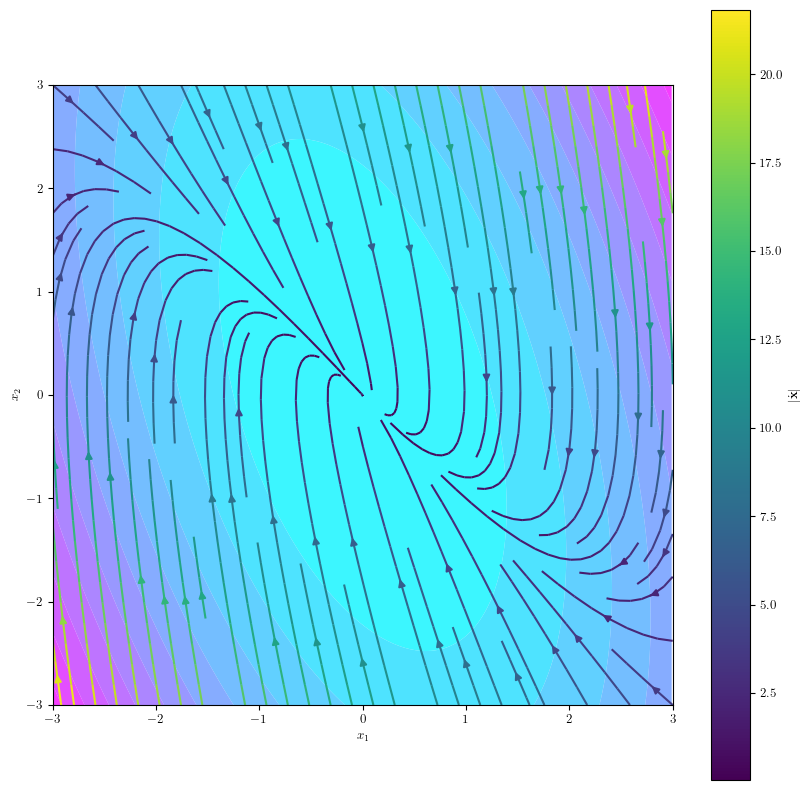

In [5]:
#this is the gain and the cost to go calculated by the LQR above
print(Kc)
print(S)

def pahse_plane_doubleint_lqr():
  # Define Symbolic Variables: States = [theta, dtheta]
  p = Variable("p")
  v = Variable("v")

  # States and State-space Form:
  x = np.array([p, v])
  f = (A- B@Kc)@x
  J = x.T@S@x
  Jdot = J.Jacobian(x).dot(f)

  display(Markdown("$J(x) = " + ToLatex(J) + "$"))
  display(Markdown("$\dot{J}(x) = " + ToLatex(Jdot) + "$"))
  display(Markdown("$f(x) = " + ToLatex(f) + "$"))

  sys = SymbolicVectorSystem(state=x, dynamics=f)
  fig, ax = plt.subplots(figsize=(10, 10))
  plot_2d_phase_portrait(sys, (-3, 3), (-3, 3))

  feature_x = np.arange(-3, 3, 0.01)
  feature_y = np.arange(-3, 3, 0.01)

  # Creating 2-D grid of features
  [X, Y] = np.meshgrid(feature_x, feature_y)

  Z = (X*(1.278*X+0.316*Y)+Y*(0.316*X+0.404*Y))
  # plots contour lines
  ax.contourf(X,Y,Z,10,cmap="cool", alpha=.8, antialiased=True)


pahse_plane_doubleint_lqr()




Couple of key observations can be made above.

* When the LQR controller is applied, all flow (trajectories) converge to the selected equilibrium point.

* Once the state reaches the equilibrium point it stays there for the rest of time (asymptoticaly stabilize to equilibrium). And at this point the cost $J(x_0)$ and its gradient $\dot{J}(x_0)$ is zero. Every where else the cost is positive $J(x) >0 ~\forall ~x \neq x_0$

* All trajectories are climbing down the cost function $J$ shown by the contour lines. i.e, the slope of the function along the trajectory $\frac{\partial{J}}{\partial x}f(x)<0 ~\forall ~x \neq x_0$

These mathematical conditions became very handy when analysing systems which have more than 2 states because the graphical analysis we followed is limited when there are more than 2 states for a given system.



The eigen values of the resulting system $A-BK$ provides more insight to the state propogation exhibited by the phase plane plot.





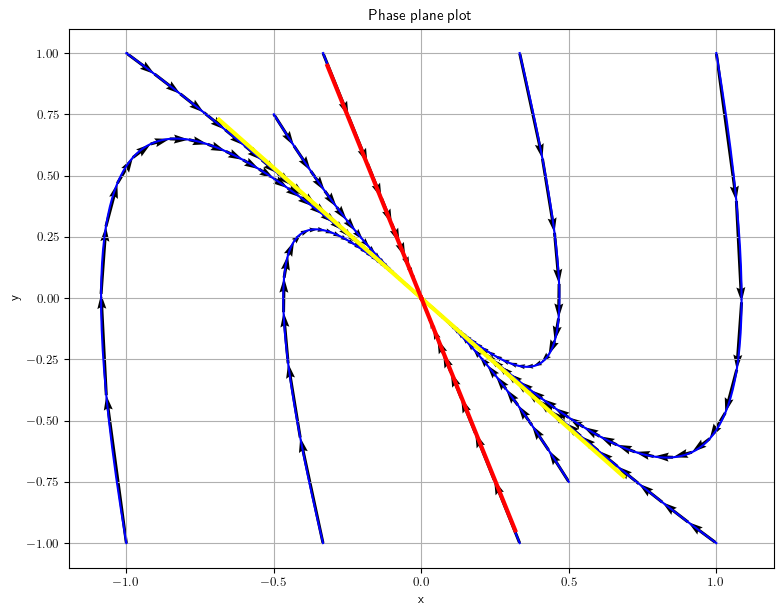

In [6]:
# Here we simulated the system without the helper functions above to have a better look at things

from numpy.core.function_base import linspace
import numpy as np
from scipy import integrate

# 1 .define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y
    # The state space model
    A= np.array([[0, 1.0],[0, 0]])
    B= np.array([[0], [1.0]]);
    C= np.eye(2);
    Kc= np.array([[3.16227766, 4.04036574]])
    return (A-B@Kc)@X

# 2. define the set of initial conditions that you want to simulate and time vector
t = np.linspace(0, 20,  1000)
X0 = np.array([[-1.        , 1],
               [-1/3.        , 1],
               [1/3.        , 1],
               [1.        , 1],
               [-1.        , -1],
               [-1/3       ,  -1],
               [1/3        ,  -1],
               [1.        ,  -1],
               [-0.5 , 0.75],
               [0.5 , -0.75]])
x_index = 0
y_index = 1

# 3. call the phase plane visualizer specifying the inde of the states you want to use for the x an y axis.
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,1)

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Phase plane plot")
ax1.grid()
for x0 in X0:
  X, infodict = integrate.odeint(Sys, x0, t, full_output=True)
  ax1.plot(X[:,x_index], X[:,y_index], color="blue")
  x=X[0:-1:5,0]
  y=X[0:-1:5,1]
  ax1.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)


eigenvalues, eigenvectors = np.linalg.eig(A_new)

X, infodict = integrate.odeint(Sys, eigenvectors[:,0], t, full_output=True)
ax1.plot(X[:,0], X[:,1], color="yellow",linewidth=3.)
ax1.plot(-X[:,0], -X[:,1], color="yellow",linewidth=3.)

X, infodict = integrate.odeint(Sys, eigenvectors[:,1], t, full_output=True)
ax1.plot(X[:,0], X[:,1], color="red",linewidth=3.)
ax1.plot(-X[:,0], -X[:,1], color="red",linewidth=3.)



the two eigen vectors define the two principle directions ( shown in red and yellow) that a state approches the equilibrium. i.e., any initial condition on these eigen vectors approaches the equilibrium following a straight line.

The eigen vector which corresponds to the smallest eigenvalue is termed the dominant direction. i.e., initial conditions not on an eigen vector  tends to make the final approaches towards the equilibrium along this dominant direction (yellow).

Linear systems are termed globaly asymptoticaly stable as any initial condition in the phase plane plot returns to the equilibrim point ( is stable). i.e., the system has a global **region of attraction**.

## **Exercise 2.7**
Consider the following linear system given in the code. Find a stabilizing LQR gain $K$ for the system by selecting a suitable Q and R Matrix. Tune the gains such that it achieve a settling time of less than 7 seconds.



[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


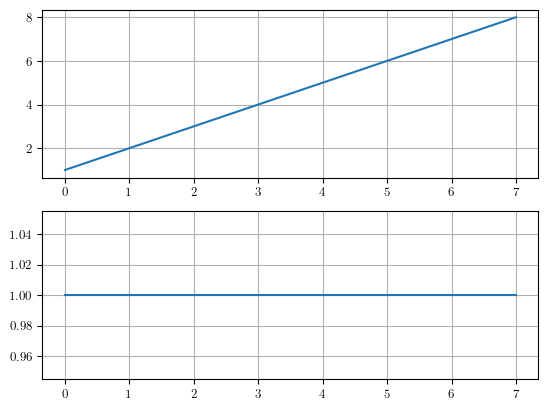

In [7]:
# The state space model
A= np.array([[0, 1.0, 0.0, 0.0],[0, 0,0,0],[0, 0,0,1],[0, 0,0,0]])
B= np.array([[0,0], [1.0,0],[0,0], [0,1.0]]);
C= np.eye(4);



Kc =np.zeros([2,4])  # TODO STUDENT:  REPLACE THIS GAIN USING AN LQR CONTROLLER

print(Kc)
#the new autonoumous system becomes dx= (A-B*Kc)x
A_new=(A-B@Kc)

sys = ct.ss(A_new,[0,0,0,0],C,0)  # Define the system
T, yout =ct.initial_response(sys,np.linspace(0.0, 7.0, num=50),[1,1,1,1])  # simulate the system model
#for 7 seconds using an initial condition of (1,2)
fig, axs = plt.subplots(2, 1)
axs[0].plot(T,yout[0]);axs[0].grid()
axs[1].plot(T,yout[1]);axs[1].grid()

# **Nonlinear models and control**

* Nonlinear models cannot be given in the stadard LTI form.

* They can be controled about a equilibrium point by linearizing about the equilibrium point.

* Upon linearization an LQR can be applied to find the stabilizing gain matrix for this equilibrium point.

* The further the state is from the equilibrium point the higher the modelling error becomes. As such the region of attraction for the LQR controller about that stabilizign point becomes a finite region unlike the linear case.

* Note that the system should be controllable about this equilibrium point in order to find LQR gains.

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1r70PUkcxppbE97ud0-EafbAvdgW2Zr2M"
    width="500"/>
</div>
</center>





Lets look at an example where a planar quadcopter is controlled.




## **Example 2.11**

Perform linearization of a 2D quadcopte model shown below to design an LQR controller to hover the quadcopter at the origin.

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1lJWOpyxgFLW2Ad0adEJuCILMow_9wqBc"
    width="700"/>
</div>
</center>

In [ ]:
import sympy # sympy is a pachage used to
px =sympy.Symbol('px'); py =sympy.Symbol('py')
vx =sympy.Symbol('vx'); vy =sympy.Symbol('vy')
vx =sympy.Symbol('vx'); vy =sympy.Symbol('vy')
theta =sympy.Symbol('θ'); omega =sympy.Symbol('ω')
u1 =sympy.Symbol('u1'); u2 =sympy.Symbol('u2')
m =sympy.Symbol('m'); g =sympy.Symbol('g'); r =sympy.Symbol('r'); I =sympy.Symbol('I')

f = sympy.Matrix([vx, -(u1 + u2)*sympy.sin(theta)/m , vy , (u1 + u2)*sympy.cos(theta)/m-g, omega,r/I*(u1-u2)])
X = sympy.Matrix([px,vx,py,vy,theta,omega])
U = sympy.Matrix([u1,u2])
Asym = f.jacobian(X)
f.jacobian(X)

Matrix([
[0, 1, 0, 0,                   0, 0],
[0, 0, 0, 0, (-u1 - u2)*cos(θ)/m, 0],
[0, 0, 0, 1,                   0, 0],
[0, 0, 0, 0, -(u1 + u2)*sin(θ)/m, 0],
[0, 0, 0, 0,                   0, 1],
[0, 0, 0, 0,                   0, 0]])

In [ ]:
f.jacobian(U)

Matrix([
[        0,         0],
[-sin(θ)/m, -sin(θ)/m],
[        0,         0],
[ cos(θ)/m,  cos(θ)/m],
[        0,         0],
[      r/I,      -r/I]])

In [ ]:
Bsym = f.jacobian(U)
Bsym = Bsym.subs([(m,1.),(theta,0.),(I,1.),(r,1.)])
B=np.array(Bsym.tolist()).astype(np.float64)
print(A)
print(B)


[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 1.  1.]
 [ 0.  0.]
 [ 1. -1.]]


In [ ]:
Asym = Asym.subs([(theta,0.),(u1,m*g/2),(u2,m*g/2)])
Asym = Asym.subs(g,9.81)
A=np.array(Asym.tolist()).astype(np.float64)
print(A)

[[ 0.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -9.81  0.  ]
 [ 0.    0.    0.    1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.  ]
 [ 0.    0.    0.    0.    0.    0.  ]]


In [ ]:
Ct =ct.ctrb(A,B)
np.linalg.matrix_rank(Ct)

6

The following simulator generates trajectories and visulaization for an LQR controller implemented on a 2d quadcopter.

Number of frames : 50


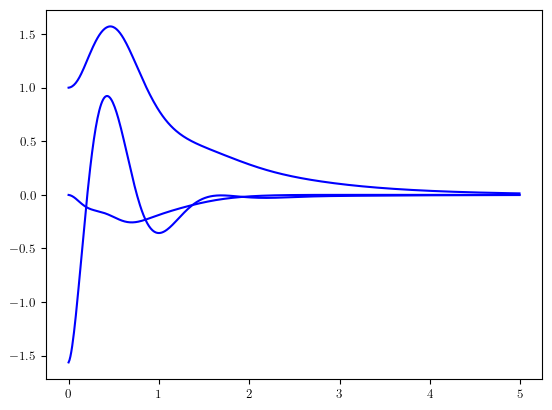

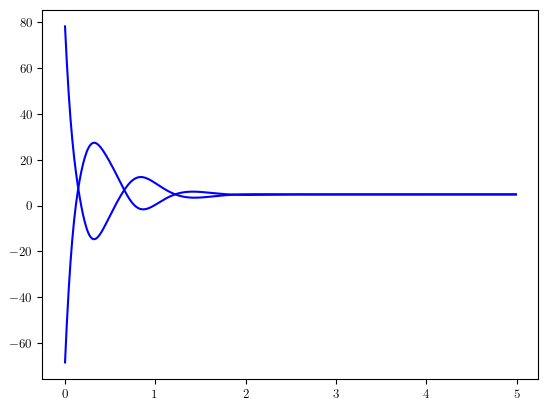

In [ ]:
# define the nonlinear system model
# the planar quadcopter
from utils import wrapToPi

def planar_quad_sys_model(x, u, t, params):
    # Get the parameters for the model
    I = params.get('Inertia')        # Inertia
    m = params.get('Mass')           # Mass
    g = params.get('Gravity')        # Gravity
    r = params.get('RotorDistance')  # Rotor distance

    # Return the derivative of the state
    return np.array([
        x[1],                           # pxdot = vx
        -(u[0] + u[1]) * np.sin(x[4]),  # vxdot = -(u1 + u2)sin(theta)/m
        x[3],                           # pydot = vy
        (u[0] + u[1]) * np.cos(x[4])/m - g,
        x[5],
        (u[0] - u[1]) * r / I ])

def int_RK4(func,x,u,t,param):
    # make sure param 0 is dt
    #dt = param[0]
    dt = params.get('dt')  # vehicle wheelbase
    k1 = func(x, u, t, param)
    k2 = func(x + dt/2. * k1, u, t + dt/2., param)
    k3 = func(x + dt/2. * k2, u, t + dt/2., param)
    k4 = func(x + dt    * k3, u, t + dt, param)
    x = x + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return x

# Default vehicle parameters
dt = 0.01
m  = 1.0
g  = 9.81
length = 1.0
t_end = 5.
params={'Inertia': 1.0, 'Mass': m, 'Gravity': g, 'RotorDistance': length, 'dt' :dt}
i=0
x=np.array([1,0.,-0.,0.,-np.pi/2,0.]) #TODO BY STUDENT : change this initial vector to find region of attraction through trial and error.
#x=np.array([-1.,0.,0.,0.,0.1,0.])
X=[];U=[];T=[];

# Define the vehicle steering dynamics as an input/output system
for t in np.arange(0,t_end,dt):
  i = i + 1
  u_ref = np.array([1.0*m*g/2,1.0*m*g/2])  # reference input of the quad
  Q = np.diag([10, 10, 10, 1, 1, (length / 2. / np.pi)])
  R = np.array([[0.1, 0.05], [0.05, 0.1]])
  # A and B from above
  Kc, S, E = ct.lqr(A,B,Q,R)

  u = -Kc @ x + u_ref
  #u =u_ref
  x = int_RK4(planar_quad_sys_model,x,u,t,params)
  x[4] = wrapToPi(x[4])

  #Data Aquisition
  X.append(np.array([x[0],x[2],x[4]]))
  T.append(t)
  U.append(u)


fig1 = plt.figure()
p = plt.plot(T, X, color='b')
fig2 = plt.figure()
p = plt.plot(T, U, color='b')

# VISUALIZATION
param= np.array([dt])
anim = gnc.animate_2Dbot(X,U,T,param,0.5,50,2) # this is a custom visualization
anim

## **Exercise 2.8**

Using the simulation above establish the region of attraction for the system using trial and error. A hand drawing of the phase plane plot generated using trials of the simulator is sufficient. Alternatively you can use python to plot a region of attraction. Please use states $p_x$ and $\theta$ as the x and y axis of the phase plane plot.

Comment on how these initial conditions ( outside region of attraction) can be handled in practical applications?

## **LQR control on Lie groups**

Here we design an LQR controller on the tagent space.
Please refer hand written note






## **Exercise 2.9**

Consider the following nonlinear system with the state $\mathbf{x} = \bf R \in \mathbb{SO}(3)$ and input $\bf u=\omega$

$$\dot{\bf R} = \bf R \bf \omega_\times $$

You are required to stabilize ths system at the equilibrium point $\bf R_{ref}$ and $\bf u_{ref}=0$. The system with stabilizing gain $\bf K$ applied takes the following form.

$$ \bf \dot{R}= R[u_{ref}-K~Log_{SO3}(RR_{ref}^T)]_\times $$

Find the matrices A and B which define the linearization of the system and find values fo $\bf Q$ and $\bf R$ which can stabilize the system within $20$ seconds or less using the simulator below. Update the code at locations which states (TODO by Student) to implement LQR control of the system.



Number of frames : 100


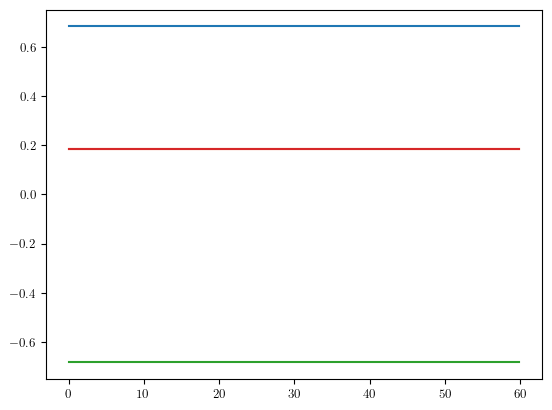

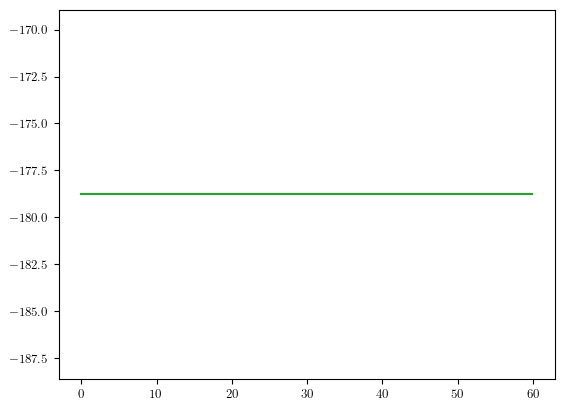

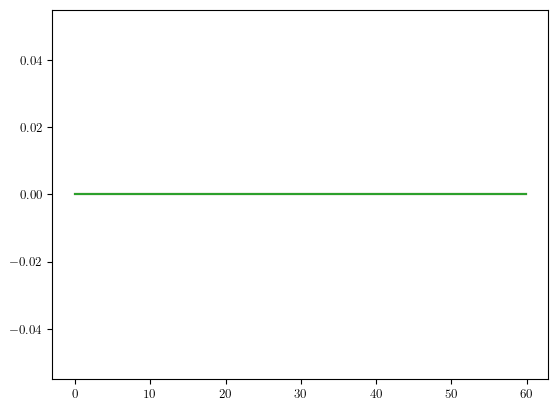

In [ ]:
from jax._src.random import RealArray
# minimal code example
# Rotating body velocity input simulation
#!pip install jaxlie
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from jaxlie import SO3
from numpy import pi

# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)

# 1. initialization
dt = 0.1
Rot0 = SO3.from_rpy_radians(20/180*pi,-90/180*pi,10/180*pi) # this is the initial condition
q0= np.array(Rot0.parameters()) # Initial angular displacement (rad) in quaternion

Rref = SO3.from_rpy_radians(0/180*pi,50/180*pi,0/180*pi) # this is the reference (equilibrium point)
qref= np.array(Rref.parameters())
t_end = 60; # 1 minute
X = []; T= []; U =[]; RPY=[]; # Variables for data acquisition

# these vectors are needed to define a system model
x = q0 # state vector - variables
param = np.array([dt])  # the parameter vector - constants


# The state space model for LQR gain computation
#TODO by student : linearize the system and fine the stabilizing gain K
#tune Q and R to acheive desired settling time.

#2 . simulation -
for t in np.arange(0,t_end,dt):


  #READ CURRENT STATE X
  q = x

  # Controller
  u = np.array([0.0,0.0,0.0])  #TODO by student : update  input vector using and LQR control law for SO(3)

  omega = u

  # INTEGRATE TO FIND NEXT X
  R = SO3(q)  # make rotmat from quaternion (wxyz)
  R = SO3.multiply(R,SO3.exp(omega*dt)) #integration

  # UPDATE NEXT STATE X
  q = np.array(R.parameters()) #rotmat to q_wxyz
  x = q
  rpy = np.array([R.compute_roll_radians(),R.compute_pitch_radians(),R.compute_yaw_radians()])*(180/pi)

  #Data Aquisition
  X.append(x)
  T.append(t)
  U.append(u)
  RPY.append(rpy)


# 4. visualization functions
fig1 = plt.figure()
p = plt.plot(T, X)
fig2 = plt.figure()
p = plt.plot(T, RPY)
fig3 = plt.figure()
p = plt.plot(T, U)


anim = gnc.animate_ahrs(X,U,T,param,100,10)
anim

## **LQR Tracking Controller**
ToDO: LQR tracking controller. Please refer the hand written note.

* The above quad copter controller had a limited region of attraction. The gains for the system were computed using a linearizatoin at an equilibrium point.

* Typically when you are far away from the equibrium point, a trajectory planner can perform the task of finding a feasible strajectory to reach the equilibrium point.

* Then the question becomes if we can feebback control along this trajectory. Turns out that this can also be done using an LQR. This will be covered in detail in the next module.







Next notebook .. how good is this controller for non linear systems, can we certify the performance.